## Time-series for assets

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import rcParams
import operator
import os
%matplotlib inline
sns.set(context='talk')
rcParams['figure.figsize'] = [10,6]


In [42]:
# parameter
std_dev_noise = 0.2
x_max = 200
y_min, y_max = [1, 10]
num_nodes = 10
x_range = np.arange(1, x_max-1)
values = np.arange(y_min, y_max)
x = np.sort(np.append(np.random.choice(x_range, num_nodes, replace=False), np.array([0, x_max-1])))
y = np.random.choice(values, num_nodes+2, replace=True)
f = interpolate.interp1d(x, y, kind='linear', bounds_error=False)

x_interpolated = np.arange(x_max)
noise = np.random.normal(0, std_dev_noise, len(x_interpolated))
signal = f(x_interpolated) + noise
df = pd.DataFrame({'round': x_interpolated, 'price': signal})


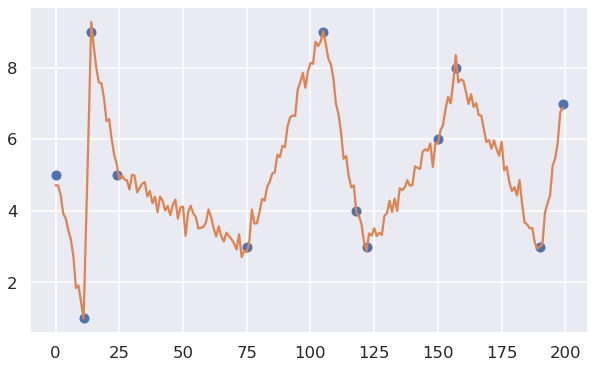

In [43]:
fig, ax = plt.subplots()
plot = ax.plot(x, y, 'o', x_interpolated, signal, '-')


In [44]:
short_period = 5
long_period = 15
df[f'sma_{short_period}'] = df['price'].rolling(window=short_period).mean()
df[f'sma_{long_period}'] = df['price'].rolling(window=long_period).mean()
df['pct_change'] = df['price'].pct_change()
df['short_long_diff'] = df.eval("sma_5 - sma_15")

In [58]:
def plot_time_series(df):
    rounds = len(df)
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16,9))
    sns.lineplot(data=df[['round','price','sma_5','sma_15']].set_index('round', drop=True), ax=ax[0]);
    sns.lineplot(data=df[['round','short_long_diff']].set_index('round', drop=True), ax=ax[1]);
    plt.hlines(y=0, xmin=0, xmax=rounds, colors='C1', linestyles='--')


In [60]:
# take the last n rounds:
last_n = 100
df_sequence = df.query("round >= @last_n").copy()
df_sequence['round'] -= last_n


In [61]:
# save asset price to disk
prefix = 'resources/data/'
os.makedirs(prefix, exist_ok=True)
file_name = os.path.join(prefix, 'asset.csv')
df_sequence.to_csv(file_name, index=False)

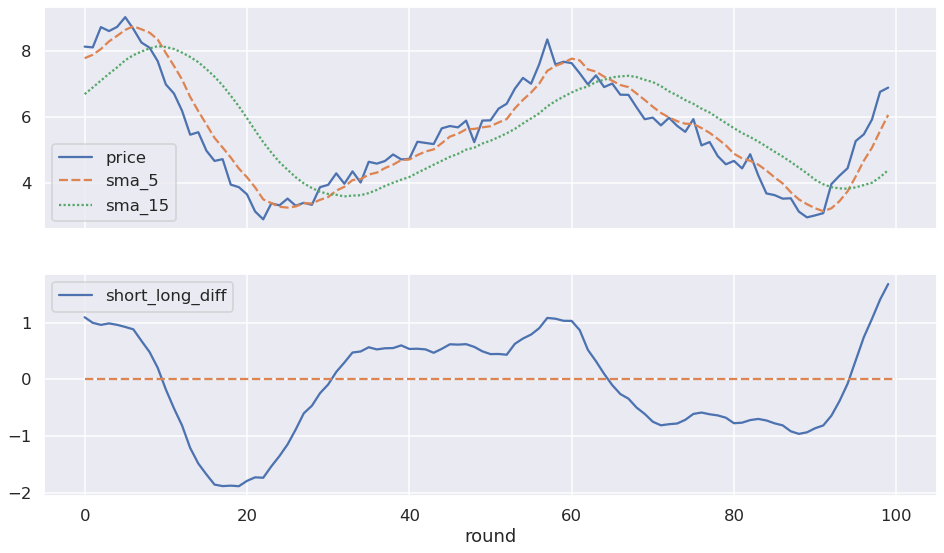

In [62]:
plot_time_series(df_sequence)